<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/Moores_Law_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install tensorflow -U
import tensorflow as tf

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
#get dataset
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-08-08 13:31:49--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-08-08 13:31:49 (42.4 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [20]:
data = pd.read_csv('moore.csv', header=None).values

In [21]:
type(data)

numpy.ndarray

In [22]:
x = data[:,0].reshape(-1,1) #make it 2-D array of  NxD  where D=1
y = data[:,1]

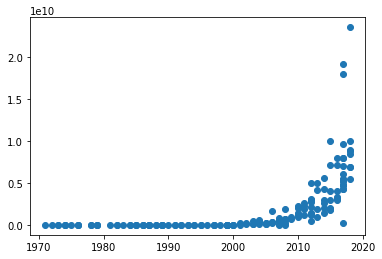

In [23]:
plt.scatter(x,y)

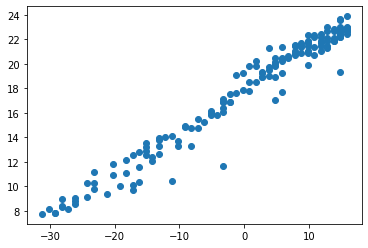

In [24]:
y = np.log(y)  #make it linear
x = x - x.mean() #let's  center the x
plt.scatter(x,y)


In [29]:
#ACTIVATION not applicable for linear regression
OPTIMIZER = tf.keras.optimizers.SGD(0.001,0.9)  #we have created our own optimizer
LOSS = 'mse'#Mean Square Error
EPOCHS  = 200
#METRICS don't care for accuracy in linear regression

In [28]:
model =tf.keras.models.Sequential([
                                   tf.keras.layers.Input(shape=(1,)),
                                   tf.keras.layers.Dense(1)
])
model.compile(optimizer = OPTIMIZER, loss = LOSS)

def schedule(epoch, learning_rate):
  return 0.0001 if epoch>=50 else 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)



In [30]:
r = model.fit(x,y, epochs=EPOCHS, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 318.0905
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 327.5260
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 446.6825
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 321.6144
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 396.7609
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 236.3620
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 238.1268
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 239.3562
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 128.9628
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 61.2786
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 47.4390
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 32.6879
Epoch 13/200
6/6 [======================

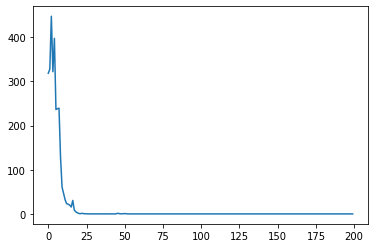

In [31]:
plt.plot(r.history['loss'], label='loss')

In [37]:
print(model.layers)
print(model.layers[0].get_weights())
slope = model.layers[0].get_weights()[0][0,0]
slope

[array([[0.3409239]], dtype=float32), array([17.735052], dtype=float32)]


0.3409239

In [41]:
time_to_double = np.log(2)/slope
time_to_double
print("Moore's law is correct" if np.abs(time_to_double - 2) < 0.1 else "Moore's law is rubbish")

Moore's law is correct
